<img align="right" style="max-width: 200px; height: auto" src="cfds_logo.png">

###  Lab 10 - "Unsupervised Machine Learning Expectation Maximization"

Chartered Financial Data Scientist (CFDS), Autumn Term 2020

In the last lab you learned about how to utilize **supervised** learning classification techniques namely (1) the Gaussian Naive-Bayes (Gaussian NB) classifier, (2) the k Nearest-Neighbor (kNN) classifier and (3) the Support Vector Machine (SVM) classifer. 

In this lab we will learn about an **unsupervised** machine learning technique referred to as **Expectation-Maximization (EM) Clustering**. We will use this technique to classify un-labelled data (i.e., data without defined categories or groups). In general, clustering-based techniques are widely used in **unsupervised machine learning**.

<img align="center" style="max-width: 500px" src="machinelearning.png">

The **Expectation-Maximization (EM) Clustering** algorithm is another popular clustering algorithms used in machine learning. The goal of EM Clustering is to maximize the likelihood of the underlying sub-distributions in a given dataset by estimating the parameters those distributions. Similarly to the **k-Means** algorithm it is often used (1) to **confirm business assumptions** about what types of groups exist or (2) to **identify unknown groups** in complex data sets. Some examples of business-related use cases are:

>- Segment customers by purchase history;
>- Segment users by activities on an application or a website;
>- Group inventory by sales activity; or,
>- Group inventory by manufacturing metrics.

(Source: https://towardsdatascience.com/a-comparison-between-k-means-clustering-and-expectation-maximization-estimation-for-clustering-8c75a1193eb7)

Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the correct group.

As always, pls. don't hesitate to ask all your questions either during the lab or send us an email (using our
fds.ai email addresses).

### Lab Objectives:

After today's lab, you should be able to:

> 1. Know how to setup a **notebook or "pipeline"** that solves a simple unsupervised clustering task.
> 2. Understand how a **Expectation-Maximization (EM) Clustering** algorithm can be trained and evaluated.
> 3. Know how to select an **optimal number of clusters** or cluster means.
> 4. Know how to Python's **sklearn library** to perform unsupervised clustering.
> 5. Understand how to **evaluate** and **interpret** the obtained clustering results.

### Setup of the Analysis Environment

Suppress potential warnings:

In [1]:
import warnings
warnings.filterwarnings('ignore')

Similarly to the previous labs, we need to import a couple of Python libraries that allow for data analysis and data visualization. In this lab will use the `Pandas`, `Numpy`, `Scikit-Learn (sklearn)`, `Matplotlib` and the `Seaborn` library. Let's import the libraries by the execution of the statements below:

In [2]:
# import the pandas data science library
import pandas as pd
import numpy as np

# import the scipy spatial distance capability
from scipy.spatial.distance import cdist

# import sklearn data sample generator libraries
from sklearn.datasets.samples_generator import make_blobs

# import sklearn k-means and gaussian-mixture classifier library
from sklearn.mixture import GaussianMixture

# import matplotlib data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# import matplotlibs 3D plotting capabilities
from mpl_toolkits.mplot3d import Axes3D

Create nice looking plots using the **seaborn** plotting theme:

In [3]:
plt.style.use('seaborn')

Enable inline Jupyter notebook plotting:

In [4]:
%matplotlib inline

Set random seed of all our experiments:

In [5]:
random_seed = 42

## 1. Expectation Maximization (EM) Algorithm

"One way to think about the k-means model is that it places a circle (or, in higher dimensions, a hyper-sphere) at the center of each cluster, with a radius defined by the most distant point in the cluster" (Jake VanderPlas, The Python Data Science Handbook). To investigate this limitation of the **k-Means Clustering** algorithm let's have a closer look at an exemplary very skewed data distribution. 

### 1.1. Dataset Creation and Data Assessment

Let's create a very skewed distribution that exhibits a eliptical characteristic:

In [46]:
# generate a sample data distribution
data, labels = make_blobs(n_samples = 1000, centers = 3, cluster_std = .7, random_state = 0)

# init the random state and skew the data
random_state = np.random.RandomState(8)
data_skewed = np.dot(data, random_state.randn(2, 2))

Once created, let's visualize the skewed distribution accordingly:

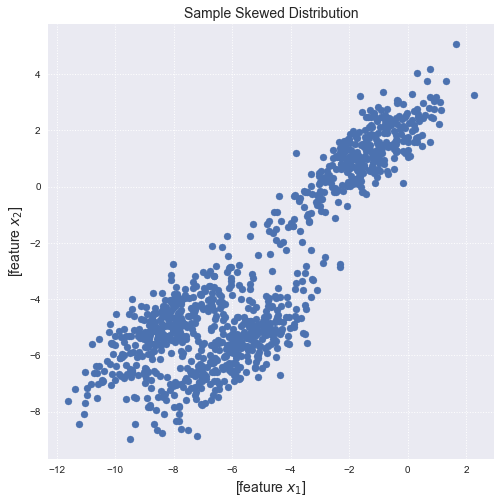

In [47]:
# init the plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# add grid
ax.grid(linestyle='dotted')

# plot the two dimensions of the skewed distribution
scatter = ax.scatter(data_skewed[:,0], data_skewed[:,1])

# add axis legends
ax.set_xlabel("[feature $x_1$]", fontsize=14)
ax.set_ylabel("[feature $x_2$]", fontsize=14)

# add plot title
plt.title('Sample Skewed Distribution', fontsize=14);

Ok, the distribution looks indeed very skewed. It furthermore seem to consist of three commingled eliptical clusters. Let's see if we can identify those clusters using the k-Means Clustering algorithm that we discussed before:

In [48]:
# init the k-Means Clustering algorithm
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=100)

# fit the clustering to the the data
kmeans.fit(data_skewed)

# obtain the cluster labels
kmeans_labels_skewed = kmeans.labels_

# obtain the cluster means
kmeans_means_skewed = kmeans.cluster_centers_

Let's now visualize the results of the clustering as well as the obtained clusters:

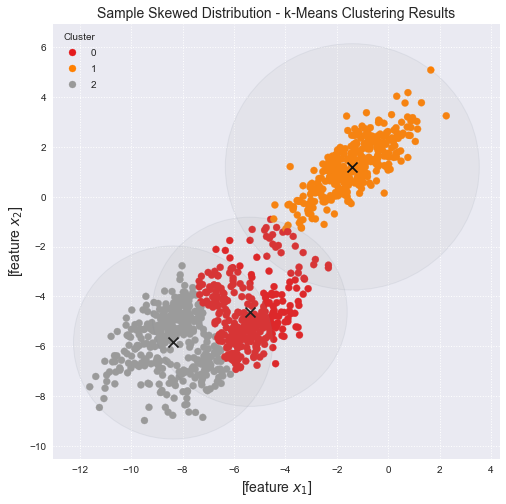

In [49]:
# init the plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# add grid
ax.grid(linestyle='dotted')

# plot petal length vs. petal width and corresponding classes
scatter = ax.scatter(data_skewed[:,0], data_skewed[:,1], c=kmeans_labels_skewed.astype(np.float), cmap=plt.cm.Set1)

# prepare data legend
ax.legend(*scatter.legend_elements(), loc='upper left', title='Cluster')

# plot cluster means
ax.scatter(kmeans_means_skewed[:,0], kmeans_means_skewed[:,1], marker='x', c='black', s=100)

# iterate over distinct cluster means
for i, mean_skewed in enumerate(kmeans_means_skewed):
    
    # determine max cluster point distance
    cluster_radi = cdist(data_skewed[:, 0:2][kmeans_labels_skewed==i], [mean_skewed]).max()
    
    # plot cluster size
    ax.add_patch(plt.Circle(mean_skewed, cluster_radi, fc='darkgrey', edgecolor='slategrey', lw=1, alpha=0.1, zorder=1))

# add axis legends
ax.set_xlabel("[feature $x_1$]", fontsize=14)
ax.set_ylabel("[feature $x_2$]", fontsize=14)

# add plot title
plt.title('Sample Skewed Distribution - k-Means Clustering Results', fontsize=14);

Based on the example above we observe one of the main disadvantages of the **k-Means Clustering** algorithm. The k-Means Clustering has no way to account for oblong or elliptical clusters. Therefore, it fails to recognize the distinct clusters in very skewed distributions.

Unlike the k-Means Clustering algorithm, the **Expectation Maximization (EM)** algorithm (introduced in the following section of the notebook) is not limited to spherical shapes. Using the EM algorithm we can constrain the algorithm to provide different covariance matrices (spherical, diagonal and generic). These different covariance matrices in return allow to control the shape of our clusters and hence we can detect sub-populations in our data with different characteristics.

### 1.2. The Expectation Maximization (EM) Algorithm of Gaussian Mixtures

The **Expectation Maximization (EM)** algorithm is similar to the k-Means Clustering technique. However, instead of assigning examples to clusters to maximize the differences in means, the EM Clustering algorithm computes probabilities of cluster memberships based on one or more probability distributions. 

The goal of the clustering algorithm then is to maximize the overall probability or likelihood of the data, given the (final) clusters. Thereby, the objective of EM clustering is to estimate the means and standard deviations for each cluster so as to maximize the likelihood of the observed data (distribution). To achieve this objective the algorithm iteratively computes an **(1) Expectation-Step** and **(2) Maximization-Step** as described in the following:

#### Step-1: The Expectation-Step

In the **"Expectation Step"** we determine the expected values $E(z_{ij} | \mu_{j}^{t}, \sigma_{j}^{t})$ that denotes the probability of a given observation $x_i \in \mathcal{R}^d$ that it was drawn from the $j^{th}$ distribution (or cluster):

$$E(z_{ij}) = \frac{P(x_i|\mu_{j}^{t}, \sigma_{j}^{t})}{\sum_{k'=1}^k P(x_i|\mu_{k'}^{t},\sigma_{k'}^{t})},$$

were:

- $x_i \in X$ denotes a particular data observation;
- $t$ denotes the current iteration of the EM Clustering algorithm;
- $\mu_j$ and $\sigma_j$ denotes the mean and (co-) variance of the $j^{th}$ distribution (or cluster).

During the lecture you learned that the probability distribution of each cluster might be approximated by a Gaussian (Normal) probability distribution $\mathcal{N}(\mu, \sigma)$. Hence the approach is usually referred to as the **EM-Algorithm of Gaussian Mixtures**. This simplification is justified by the application of the **"law of large numbers"** or **"Central Limit Theorem"** (you may want to have a look at the details of the theorem via the following link: https://en.wikipedia.org/wiki/Central_limit_theorem). In general, the probability density of a Gaussian "Normal" distribution, as defined by the formula below. It is parametrized its mean $\mu$ and corresponding standard deviation $\sigma$:

$$ P(x|\mu,\sigma)  \approx \mathcal{N}(x|\mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{1}{2\sigma^{2}}(x - \mu)^2}$$

Using the **Central Limit Theorem** we can rewrite the formula of the Expectation Step as:

$$E(z_{ij}) = \frac{P(x_i|\mu_j^{t}, \sigma_j^{t})}{\sum_{k'=1}^k P(x_i|\mu_{k'}^{t},\sigma_{k'}^{t})} = \frac{\mathcal{N}(x_i|\mu_j^{t}, \sigma_j^{t})}{\sum_{k'=1}^k \mathcal{N}(x_i|\mu_{k'}^{t},\sigma_{k'}^{t})} = \frac{ \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{1}{2\sigma_{j}^{t 2}}(x_i - \mu_{j}^{t})^2} }{ \sum_{k'=1}^{k} \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{1}{2\sigma_{k'}^{t 2}}(x_i - \mu_{k'}^{t})^2} }$$

The distinct $E(z_{ij})$ values $z_{1j}$, $z_{2j}$, ..., $z_{nj}$ represent the probability distribution of the $j^{th}$ cluster that the data point is drawn from. Understanding the range of values the $z$ values can take is important. Each observation $x_i$ has k associated $E(z_{ij})$ values. In the **k-Means Clustering** algorithm each $z_{ij}$ can only take the value 0 or 1. This is why the k-Means Clustering algorithm is referred to as **"hard"** clustering.

In contrast, the **"EM-Clustering"** algorithm is referred to as **"soft"** or **"fuzzy"** clustering. In EM-Clustering the distinct observations $x_i$ are considered to be drawn probabilistically from the distinct cluster distributions $j$. The corresponding $z_{ij}$ values can therefore be $z_{i1}$=0.85, $z_{i2}$=0.10 and $z_{i3}$=0.05, which represents a strong probability that the $x_{i}$ value originates from distribution (or cluster) 1 and a exhibit a smaller probability that it originates from distribution (or cluster) 2 or 3.

#### Step-2: The Maximization-Step

In the **"Maximization-Step"** we calculate update the parameters of each Gaussian "Normal" cluster distribution. Therefore, we derive for each $j^{th}$ distribution (or cluster) a new $\mu_{j}$ and $\sigma_{j}$ parameter value as given by:

$$ \mu_{k}^{t+1} = \frac {\sum_{k'=1}^{k}E(z_{ij})x_i} {\sum_{k'=1}^{k}E(z_{ij})}; \sigma_{j}^{2, t+1} = \frac {\sum_{k'=1}^{k}E(z_{ij}) (x_i - \mu_{k}^{t})^{2}} {\sum_{k'=1}^{k}E(z_{ij})}$$

### 1.3. Expectation Maximization (EM) in a 2-Dimensional Feature Space

Similarly, to k-Means Clustering let's now define the parameters of the **EM-Clustering** algorithm. We will start by specifying the **number of clusters** $k$ we aim to detect in the iris dataset. We again hypothesize that our observations are drawn from an unknown distributions of three iris flower species (each distribution corresponding to a different mean $\mu_1$, $\mu_2$, and, $\mu_3$ and corresponding standard deviation $\sigma_1$, $\sigma_2$, and, $\sigma_3$). Therefore, we set the number of clusters to be detected to $k=3$:

In [50]:
no_clusters = 3

Next, we need to define a corresponding number of **initial 'means' $\mu_{i}$** (the initial random cluster centers) that will be used as 'starting points' in the first iteration of the clustering process. In our case we will specify $k=3$ cluster means each of dimension 2, since we aim to retrieve 3 clusters based on the 2 features $x_1$ and $x_2$:

In [51]:
init_means = np.array([[1.0, 3.0], [2.0, 6.0], [1.0, 7.0]])

Finally, we will define a **maximum number of iterations** that we want to run the **EM-Clustering** algorithm. Please, note that the clustering terminates once there will be no further changes in the cluster assignments. However, it's good practice to define an upper bound of the iterations applied in the clustering (especially when analyzing datasets that exhibt a high-dimensional feature space):

In [52]:
max_iterations = 50

Now, we are ready to initialize an instance of the **EM-Clustering** algorithm using Python's `sklearn` library of data science algorithms. Please note again, that for each classifier, available in the `sklearn` library, a designated and detailed documentation is provided. It often also includes a couple of practical examples and use cases. The documentation of the **EM-Clustering** algorithm can be obtained from the following url: 

https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

In [53]:
em = GaussianMixture(n_components=no_clusters, means_init=init_means, max_iter=max_iterations)

Let's run the **EM-Clustering** to learn a model of the $x_1$ and $x_2$ features. Similar to the k-Means Clustering we will again make use of the `fit()` method provided by `sklearn` for each of its classifiers:

In [54]:
em.fit(data_skewed)

GaussianMixture(max_iter=50,
                means_init=array([[1., 3.],
       [2., 6.],
       [1., 7.]]),
                n_components=3)

Now that we have conducted the clustering, let's inspect the distinct cluster labels that have been assigned to the individual records of our artificial dataset. This can be achieved by calling the `predict()` function of the fitted model: 

In [55]:
em_labels_skewed = em.predict(data_skewed)

Furthermore, we want to inspect the coordinates of the cluster means (sometimes also referred to as "centroids") assigned by the algorithm. This can be achieved by calling the `means_`attribute of the fitted model:

In [56]:
em_means_skewed = em.means_ 

Let's now visually inspect the clustering results of the two features $x_1$ and $x_2$ in terms of the cluster assignments of each observation and cluster means learned by the **EM-Clustering** algorithm:

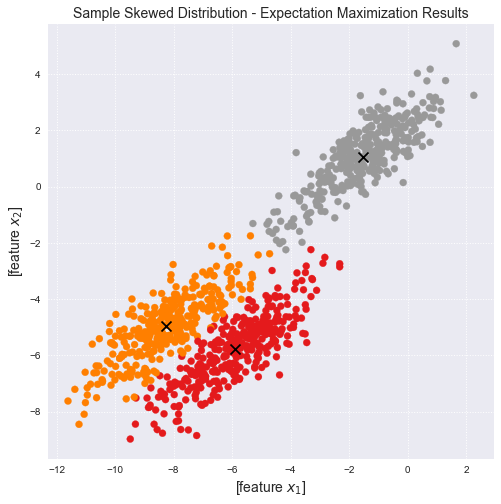

In [57]:
# init the plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# add grid
ax.grid(linestyle='dotted')

# plot x_1 vs. x_2 and corresponding cluster labels
scatter = ax.scatter(data_skewed[:,0], data_skewed[:,1], c=em_labels_skewed.astype(np.float), cmap=plt.cm.Set1)

# plot cluster means
ax.scatter(em_means_skewed[:,0], em_means_skewed[:,1], marker='x', c='black', s=100)

# add axis legends
ax.set_xlabel("[feature $x_1$]", fontsize=14)
ax.set_ylabel("[feature $x_2$]", fontsize=14)

# add plot title
plt.title('Sample Skewed Distribution - Expectation Maximization Results', fontsize=14);

Ok, we can observe that the **EM Clustering** technique nicely clusters the distinct distributions of the skewed distributions. We notice that the results are quite different from those computed by the k-Means clustering. As initially stated, the EM Clustering determines the **probability of cluster memberships** for each observation based on the initially specified $k$ probability distributions. Let's obtain the probability of each observation using the `predict_proba()` function:

In [58]:
em_probabilities_skewed = em.predict_proba(data_skewed)

Let's now visually inspect the clustering results of the two features $x_1$ and $x_2$ in terms of the learned probabilities of each observation corresponding to a particular cluster as determined by the **EM-Clustering** algorithm:

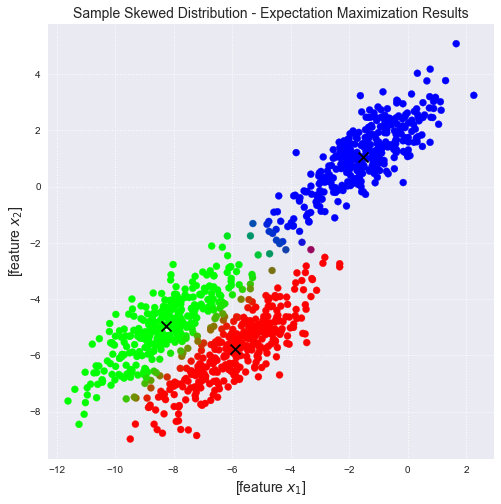

In [59]:
# init the plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# add grid
ax.grid(linestyle='dotted')

# plot x_1 vs. x_2 and corresponding cluster labels
scatter = ax.scatter(data_skewed[:,0], data_skewed[:,1], c=em_probabilities_skewed.astype(np.float), cmap=plt.cm.Set1)

# plot cluster means
ax.scatter(em_means_skewed[:,0], em_means_skewed[:,1], marker='x', c='black', s=100)

# add axis legends
ax.set_xlabel("[feature $x_1$]", fontsize=14)
ax.set_ylabel("[feature $x_2$]", fontsize=14)

# add plot title
plt.title('Sample Skewed Distribution - Expectation Maximization Results', fontsize=14);

It can be observed that the EM-Clustering algorithm conducts a **"soft"** or **"fuzzy"** cluster assignment especially for observations that reside at the edges of the distinct clusters.

### Excercises:

We recommend you to try the following exercises as part of the lab:

**1. Apply the EM Clustering algorithm to all four features contained in the Iris dataset.**

> Use the EM classifier to learn a model of all four features contained in the Iris dataset (that we used in the prior lab on k-Means Clustering), namely `Sepal length (cm)`, `Sepal width (cm)`, `Petal length (cm)` and `Petal width (cm)`.

In [ ]:
# ***************************************************
# INSERT YOUR CODE HERE
# ***************************************************

**2. Determine the optimal number of cluster values $k$ of all four features contained in the iris dataset.**

> Determine the optimal number of clusters $k$ needed to cluster the observations of all four features contained in the iris dataset using the **'Bayesian Information Criteria (BIC)'** technique described in the lecture. (Hint: Have a look at the `BIC` method explained in the `sklearn` documentation of the **EM Clustering** algorithm).

In [ ]:
# ***************************************************
# INSERT YOUR CODE HERE
# ***************************************************

### Lab Summary:

In this lab, a step by step introduction into the unsupervised **EM-Clustering** algorithm was presented. The code and exercises presented in this lab may serve as a starting point for more complex and tailored programs.

You may want to execute the content of your lab outside of the Jupyter notebook environment, e.g. on a compute node or a server. The cell below converts the lab notebook into a standalone and executable python script. Pls. note that to convert the notebook, you need to install Python's **nbconvert** library and its extensions:

In [60]:
# installing the nbconvert library
!pip3 install nbconvert
!pip3 install jupyter_contrib_nbextensions

Let's now convert the Jupyter notebook into a plain Python script:

In [6]:
!jupyter nbconvert --to script cfds_lab_10.ipynb

[NbConvertApp] Converting notebook cfds_lab_10.ipynb to script
[NbConvertApp] Writing 17322 bytes to cfds_lab_10.py
